In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from equilibria import thomas_algorithm

In [78]:
def solve_bvp(P, a, b, u_a, u_b, h):
    """
    Solve the boundary value problem (BVP) for the equation u''(y) = P
    with boundary conditions u(a) = u_a and u(b) = u_b.
    """
    # Step 1: Determine the number of points (N)
    N = int((b - a) / h) + 1  # Total number of points
    y_values = np.linspace(a, b, N)  # Discretized y values

    # Step 2: Initialize the coefficient matrix A and right-hand side vector rhs for the N-2 interior points
    A = np.zeros((N-2, N-2))
    rhs = np.zeros(N-2)

    # Step 3: Populate the tridiagonal matrix A and the RHS vector
    for i in range(1, N-1):
        A[i-1, i-1] = -2
        if i > 1:
            A[i-1, i-2] = 1
        if i < N-2:
            A[i-1, i] = 1
        rhs[i-1] = -P * h**2

    # Step 4: Adjust the RHS vector to account for the boundary conditions
    rhs[0] -= u_a
    rhs[-1] -= u_b

    # Step 5: Use Thomas algorithm to solve
    u_internal = thomas_algorithm(A, rhs)

    # Step 6: Combine boundary values with internal solution
    u_values = np.zeros(N)
    u_values[0] = u_a
    u_values[1:N-1] = u_internal
    u_values[-1] = u_b

    return y_values, u_values


In [79]:

def plot_bvp(y_values, u_values, P):
    """
    Plot u values against y values with a completely dark background and a compact, middle-sized design.
    
    Parameters:
    y_values (numpy array): The y values.
    u_values (numpy array): The corresponding u values.
    P (float): The constant used in the boundary value problem.
    """
    # Use a completely dark background
    fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
    
    # Set the background to complete black for the figure and axes
    fig.patch.set_facecolor('#000000')  # Black background for the entire figure
    ax.set_facecolor('#000000')  # Black background for the plot area
    
    # Plot the solution line with a refined style
    ax.plot(y_values, u_values, color="cyan", linewidth=1.5, label=f"Solution for $P = {P}$")
    
    # Set a professional-style title with a serif font
    ax.set_title(f"Solution of Boundary Value Problem\nwith Constant Source Term $P = {P}$", 
                 fontsize=12, fontweight='bold', color='lightblue', 
                 fontname="Times New Roman", pad=10)
    
    # Set labels with a smaller, consistent color
    ax.set_xlabel("y", fontsize=10, color='lightgray', fontname="Times New Roman")
    ax.set_ylabel("u(y)", fontsize=10, color='lightgray', fontname="Times New Roman")
    
    # Add a grid and adjust tick properties for a clean look
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='dimgray')
    ax.minorticks_on()
    
    # Set tick locator and appearance
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.tick_params(axis='x', colors='lightgray', direction='out')
    ax.tick_params(axis='y', colors='lightgray', direction='out')
    
    # Adjust plot limits for clarity
    ax.set_xlim([y_values[0], y_values[-1]])
    ax.set_ylim([min(u_values) - 0.1 * abs(min(u_values)), max(u_values) + 0.1 * abs(max(u_values))])

    # Set legend with minimalistic design
    ax.legend(loc="best", fontsize=8, frameon=False, labelcolor='white')

    # Tight layout for a compact, publication-ready style
    plt.tight_layout()
    plt.show()


In [75]:
# Parameters
a = 0.0      # Start of the interval
b = 1.0      # End of the interval
u_a = 0.0    # Boundary condition at y=a
u_b = 1.0    # Boundary condition at y=b
h = 0.0001    # Step size


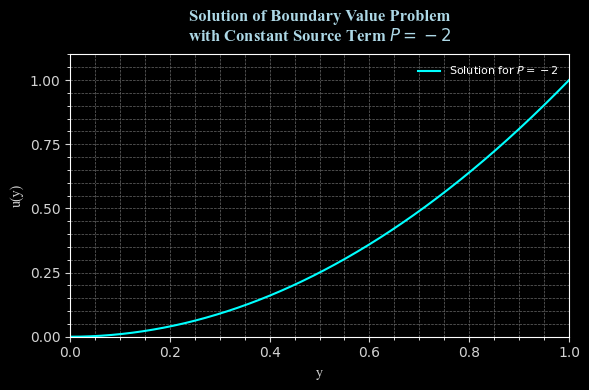

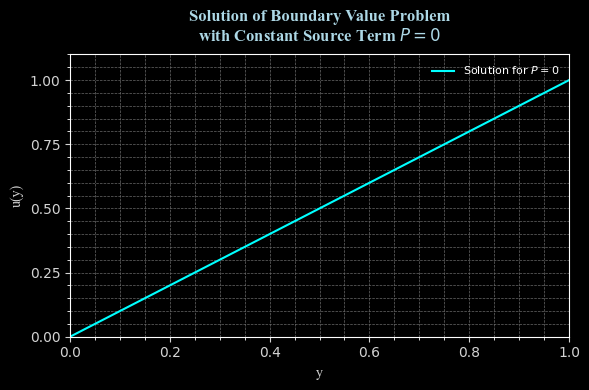

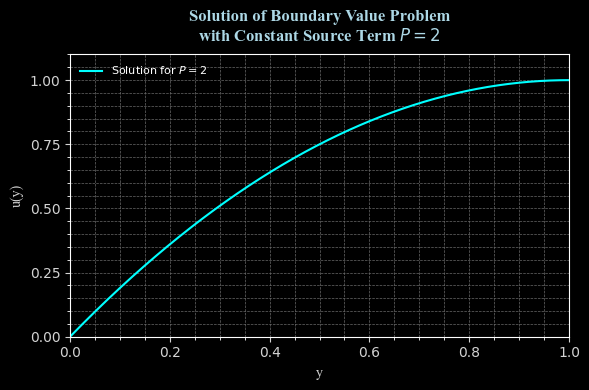

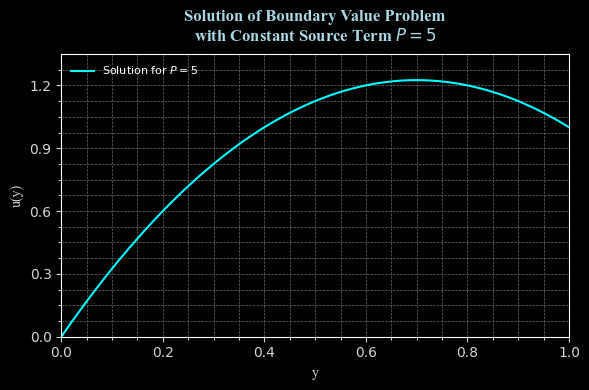

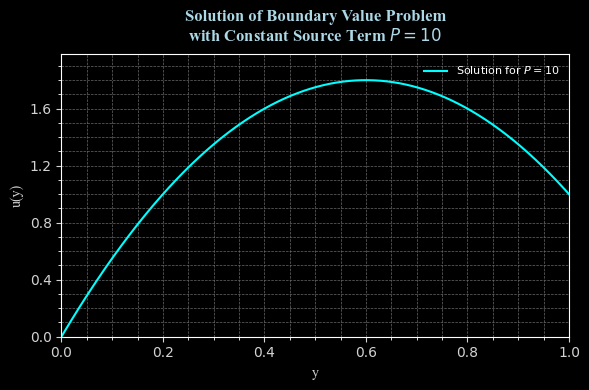

In [88]:
# List of P values to plot
P_values = [-2, 0, 2, 5, 10]

# Loop through each P value and generate the corresponding plot
for P in P_values:
    # Solve the boundary value problem for each P
    y_vals, u_vals = solve_bvp(P, a, b, u_a, u_b, h)
    
    # Call the plotting function
    plot_bvp(y_vals, u_vals, P)


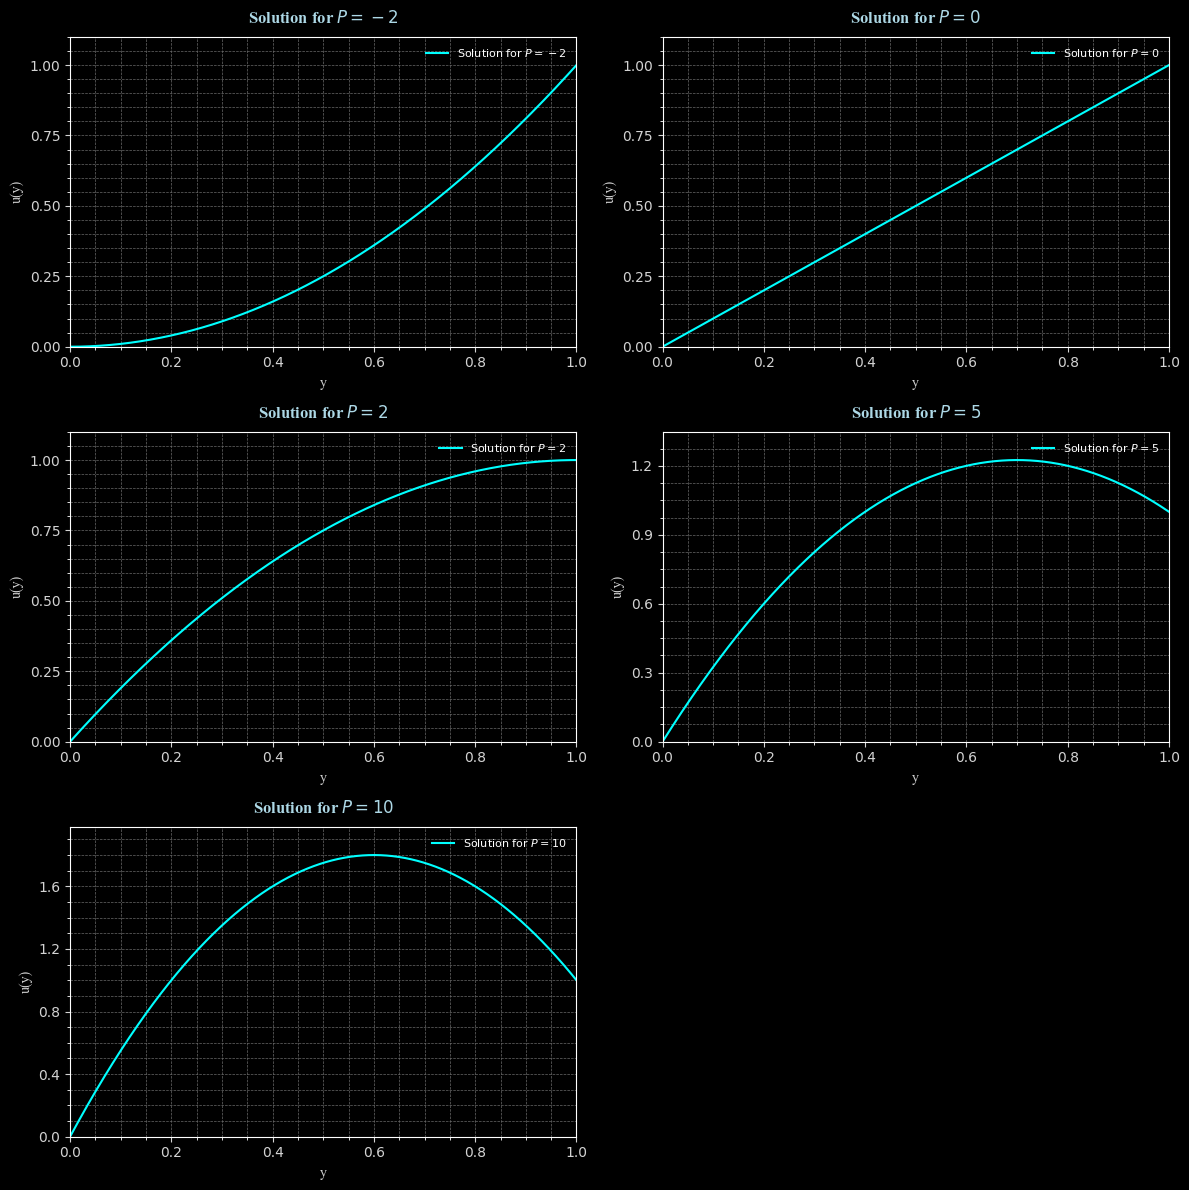

In [89]:

# List of P values to plot
P_values = [-2, 0, 2, 5, 10]

# Create a figure with 3 rows and 2 columns, leaving one space in the bottom center
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=100)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each P value and generate the corresponding plot
for i, P in enumerate(P_values):
    # Solve the boundary value problem for each P
    y_vals, u_vals = solve_bvp(P, a, b, u_a, u_b, h)
    
    # Set background color for each subplot to dark black
    ax = axes[i]
    ax.set_facecolor('#000000')  # Black background for the plot area

    # Plot on the ith subplot
    ax.plot(y_vals, u_vals, color="cyan", linewidth=1.5, label=f"Solution for $P = {P}$")
    
    # Set titles and labels for each subplot
    ax.set_title(f"Solution for $P = {P}$", fontsize=12, fontweight='bold', color='lightblue', fontname="Times New Roman", pad=10)
    ax.set_xlabel("y", fontsize=10, color='lightgray', fontname="Times New Roman")
    ax.set_ylabel("u(y)", fontsize=10, color='lightgray', fontname="Times New Roman")
    
    # Add grid and other aesthetic properties
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='dimgray')
    ax.minorticks_on()
    
    # Set tick locator and appearance
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.tick_params(axis='x', colors='lightgray', direction='out')
    ax.tick_params(axis='y', colors='lightgray', direction='out')
    
    # Adjust plot limits for clarity
    ax.set_xlim([y_vals[0], y_vals[-1]])
    ax.set_ylim([min(u_vals) - 0.1 * abs(min(u_vals)), max(u_vals) + 0.1 * abs(max(u_vals))])

    # Set legend with minimalistic design
    ax.legend(loc="best", fontsize=8, frameon=False, labelcolor='white')

# Turn off the empty subplot in the bottom right (index 5)
fig.delaxes(axes[5])

# Adjust layout to make sure everything fits without overlap
plt.tight_layout()

# Show the final plot
plt.show()


